In [1167]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [1168]:
house_df = pd.read_csv("Dataset_LR_Mini_Project.csv")

In [1169]:
house_df.shape

(2919, 13)

In [1170]:
house_df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [1171]:
house_df.drop_duplicates(inplace = True)

In [1172]:
house_df.shape

(2919, 13)

In [1173]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [1174]:
house_df.drop(columns = ['Id'],inplace = True)

In [1175]:
house_df.drop(columns = ['MSZoning'],inplace = True)

In [1176]:
house_df.drop(columns = ['LotConfig'],inplace = True)

In [1177]:
house_df.drop(columns = ['BldgType'],inplace = True)

In [1178]:
house_df.drop(columns = ['Exterior1st'],inplace = True)

In [1179]:
house_df.drop(columns = ['BsmtFinSF2'],inplace = True)

In [1180]:
house_df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,856.0,208500.0
1,20,9600,8,1976,1976,1262.0,181500.0
2,60,11250,5,2001,2002,920.0,223500.0
3,70,9550,5,1915,1970,756.0,140000.0
4,60,14260,5,2000,2000,1145.0,250000.0


In [1181]:
house_df.isna().sum()

MSSubClass         0
LotArea            0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [1182]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(house_df[['SalePrice']])

SimpleImputer()

In [1183]:
imputer.statistics_

array([180921.19589041])

In [1184]:
house_df['SalePrice'] = imputer.transform(house_df[['SalePrice']])

In [1185]:
house_df.isna().sum()

MSSubClass      0
LotArea         0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [1186]:
house_df = house_df.fillna(0)

In [1187]:
house_df.isna().sum()

MSSubClass      0
LotArea         0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [1188]:
house_df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,1051.417266,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,441.120498,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,989.000000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,6110.000000,755000.000000


In [1189]:
import matplotlib.pyplot as plt
import seaborn as sns

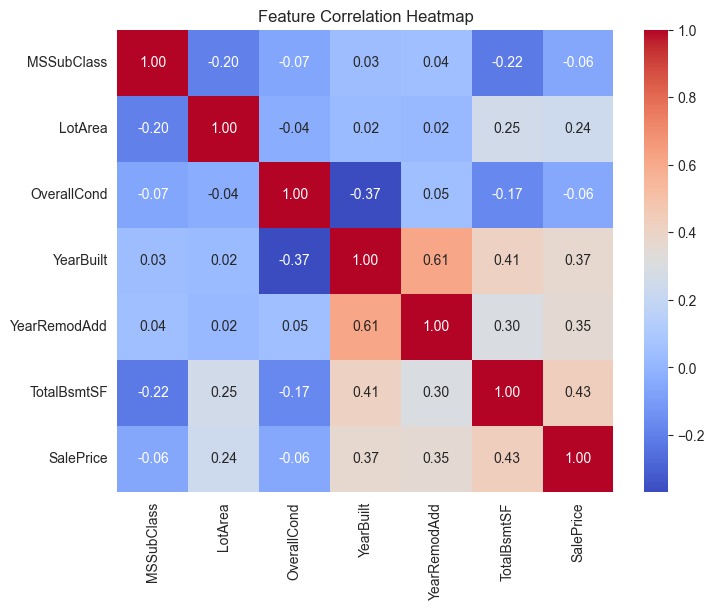

In [1190]:
plt.figure(figsize=(8, 6))
sns.heatmap(house_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


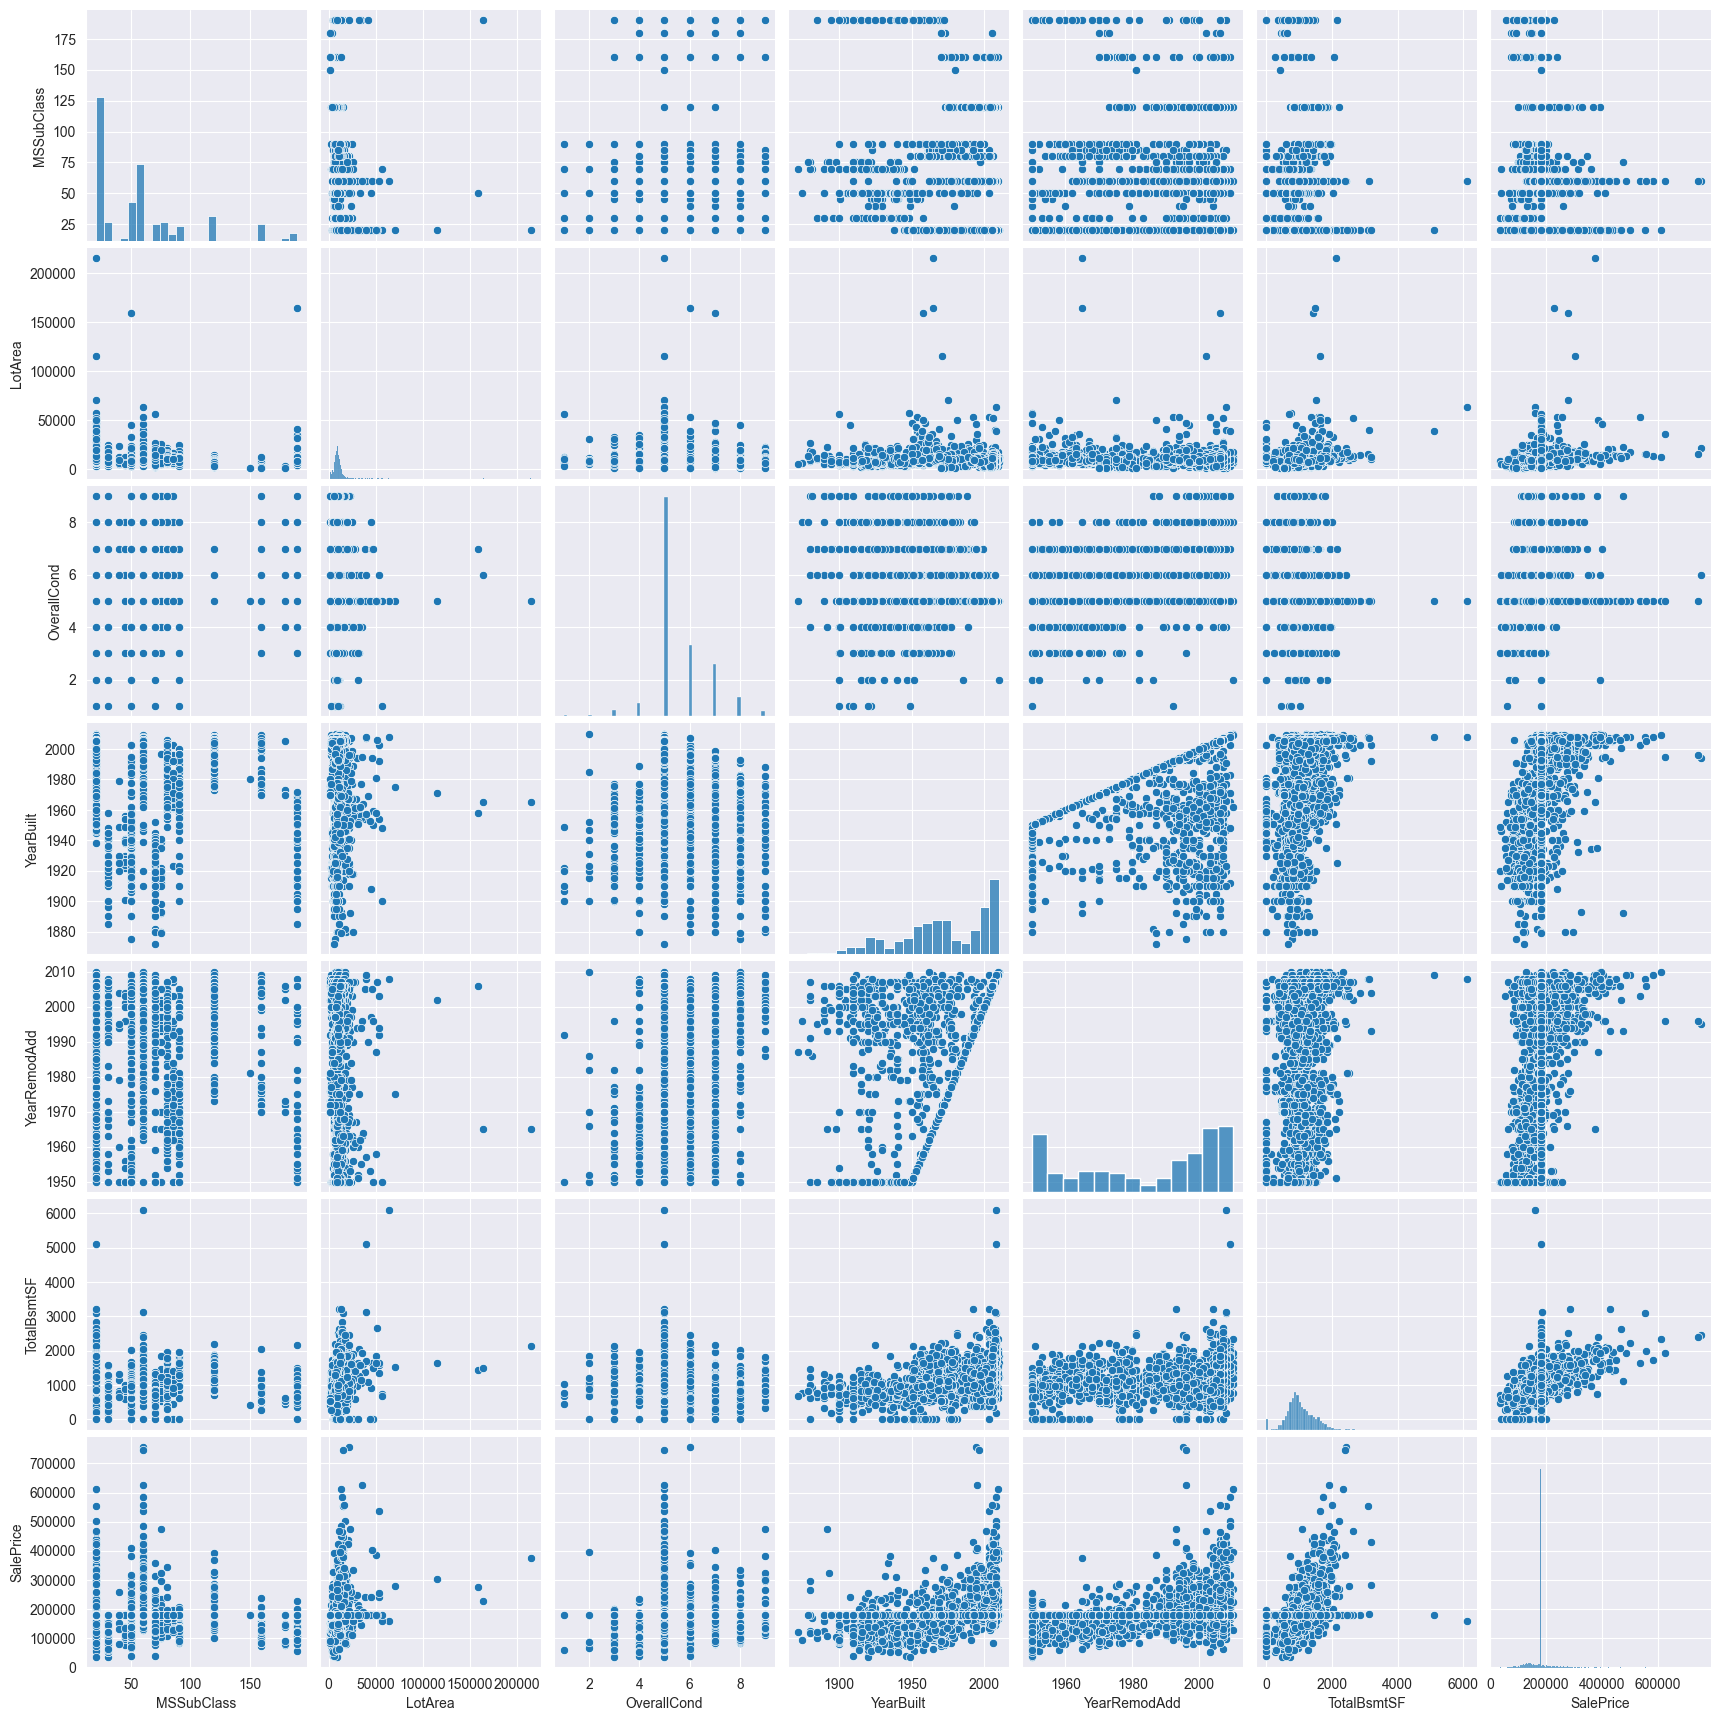

In [1191]:
sns.pairplot(house_df)
plt.show()

In [1192]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice
0,60.0,8450.0,5.0,-2003.0,2003.0,856.0,208500.00000
1,20.0,9600.0,8.0,-1976.0,1976.0,1262.0,181500.00000
2,60.0,11250.0,5.0,-2001.0,2002.0,920.0,223500.00000
3,70.0,9550.0,5.0,-1915.0,1970.0,756.0,140000.00000
6,20.0,10084.0,5.0,-2004.0,2005.0,1686.0,307000.00000
...,...,...,...,...,...,...,...
2913,160.0,1526.0,5.0,-1970.0,1970.0,546.0,180921.19589
2914,160.0,1936.0,7.0,-1970.0,1970.0,546.0,180921.19589
2915,160.0,1894.0,5.0,-1970.0,1970.0,546.0,180921.19589
2917,85.0,10441.0,5.0,-1992.0,1992.0,912.0,180921.19589


In [1193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2550 entries, 0 to 2918
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2550 non-null   float64
 1   LotArea       2550 non-null   float64
 2   OverallCond   2550 non-null   float64
 3   YearBuilt     2550 non-null   float64
 4   YearRemodAdd  2550 non-null   float64
 5   TotalBsmtSF   2550 non-null   float64
 6   SalePrice     2550 non-null   float64
dtypes: float64(7)
memory usage: 159.4 KB


In [1194]:
df['MSSubClass'] = df['MSSubClass'].astype(float)
df['LotArea'] = df['LotArea'].astype(float)
df['OverallCond'] = df['OverallCond'].astype(float)
df['YearBuilt'] = df['YearBuilt'].astype(float)
df['YearRemodAdd'] = df['YearRemodAdd'].astype(float)
df['YearBuilt'] = -df['YearBuilt']

In [1195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2550 entries, 0 to 2918
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2550 non-null   float64
 1   LotArea       2550 non-null   float64
 2   OverallCond   2550 non-null   float64
 3   YearBuilt     2550 non-null   float64
 4   YearRemodAdd  2550 non-null   float64
 5   TotalBsmtSF   2550 non-null   float64
 6   SalePrice     2550 non-null   float64
dtypes: float64(7)
memory usage: 159.4 KB


In [1196]:
df.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,SalePrice
0,60.0,8450.0,5.0,2003.0,2003.0,856.0,208500.0
1,20.0,9600.0,8.0,1976.0,1976.0,1262.0,181500.0
2,60.0,11250.0,5.0,2001.0,2002.0,920.0,223500.0
3,70.0,9550.0,5.0,1915.0,1970.0,756.0,140000.0
6,20.0,10084.0,5.0,2004.0,2005.0,1686.0,307000.0


In [1197]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [1198]:
X = df.drop(columns='SalePrice')
y = df['SalePrice']

In [1199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [1200]:
X[:] = scaler.transform(X)

In [1201]:
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF
0,0.235294,0.574722,0.500,0.949275,0.883333,0.266999
1,0.000000,0.669411,0.875,0.753623,0.433333,0.393637
2,0.235294,0.805270,0.500,0.934783,0.866667,0.286962
3,0.294118,0.665294,0.500,0.311594,0.333333,0.235808
6,0.000000,0.709263,0.500,0.956522,0.916667,0.525889
...,...,...,...,...,...,...
2913,0.823529,0.004611,0.500,0.710145,0.333333,0.170306
2914,0.823529,0.038370,0.750,0.710145,0.333333,0.170306
2915,0.823529,0.034911,0.500,0.710145,0.333333,0.170306
2917,0.382353,0.738658,0.500,0.869565,0.700000,0.284467


In [1202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [1203]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2040, 6), (510, 6), (2040,), (510,))

In [1204]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [1205]:
y_pred = model.predict(X_test)

In [1206]:
y_test[:5]

1054    255000.00000
1490    180921.19589
1460    180921.19589
2061    180921.19589
2009    180921.19589
Name: SalePrice, dtype: float64

In [1207]:
y_pred[:5]

array([200384.19936416, 195728.49890198, 167439.49479149, 165567.96290168,
       198110.58186169])

In [1212]:
from sklearn.metrics import mean_absolute_error

In [1213]:
mean_absolute_error(y_test,y_pred)

28270.84804915207

In [1214]:
model.coef_

array([ 13484.758081  ,  36672.03984639,  22927.15252004,  45205.09791368,
        20465.09417814, 104987.04344384])

In [1215]:
model.intercept_

60667.03819628162

In [1219]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.32275804752948845


#### For new input out of the data

In [1166]:
#a = 'MSSubClass', b = 'LotArea', c = 'OverallCond', d = -1*'YearBuilt', e = 'YearRemodAdd',f = 'TotalBsmtSF'
#for example: a = 80,b=11645,c = 5,d=-1997,e = 2010,f = 1262
new_input = np.array([[a,b,c,d,e,f]])
new_input_scaled = scaler.transform(new_input)
prediction = model.predict(new_input_scaled)
print("Predicted Output:", prediction)

NameError: name 'a' is not defined

# For more optimised(Low MAE)

In [545]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 50,max_iter = 100,tol = 0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [546]:
lasso_pred = lasso_reg.predict(X_test)

In [547]:
mean_absolute_error(y_test,lasso_pred)

28060.31606025172

In [548]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50,max_iter = 100,tol = 0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [549]:
ridge_pred = ridge_reg.predict(X_test)

In [550]:
mean_absolute_error(y_test,ridge_pred)

27138.497707724757